# chap1

## Python

In [1]:
import sys
print(sys.version)

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


In [2]:
1+2

3

In [3]:
type(2.17)

float

In [4]:
a = [1,2,3]
print(a)

[1, 2, 3]


In [5]:
me = {'height':100}
print(me)

{'height': 100}


In [6]:
me['weight'] = 70
print(me)

{'height': 100, 'weight': 70}


In [7]:
for i in [1,2,3]:
    print(i)

1
2
3


In [8]:
def hello():
    print("hello world")

hello()

hello world


In [9]:
class Man:
    def __init__(self, name):
        self.name = name
        print("Init")

    def hello(self):
        print("Hello " + self.name + "!")

    def goodbye(self):
        print("Good-bye " + self.name + "!")

m = Man("陈萱")
m.hello()
m.goodbye()

Init
Hello 陈萱!
Good-bye 陈萱!


## Numpy

In [10]:
import numpy as np

In [11]:
x = np.array([1.0, 2.0, 3.0])
y = np.array([2.0, 3.0, 4.0])
print(x + y)
print(x / 2.0)
print(x / 2)

[3. 5. 7.]
[0.5 1.  1.5]
[0.5 1.  1.5]


In [12]:
A = np.array([[1,2],[3,4]])
print(A)
print(A.shape)
print(type(A))

[[1 2]
 [3 4]]
(2, 2)
<class 'numpy.ndarray'>


In [13]:
print(A*10)

[[10 20]
 [30 40]]


In [14]:
B = np.array([10, 20])
print(A)
print(B)
print(A * B)

[[1 2]
 [3 4]]
[10 20]
[[10 40]
 [30 80]]


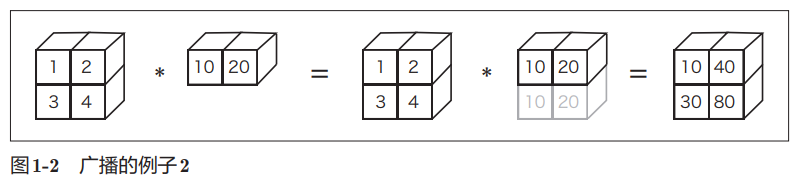

In [15]:
X = np.array([[1,2],[3,4],[5,6]])
print(X)
print(X.flatten())

[[1 2]
 [3 4]
 [5 6]]
[1 2 3 4 5 6]


In [16]:
X = X.flatten()
print(X)
X[np.array([0, 2, 4])]

[1 2 3 4 5 6]


array([1, 3, 5])

In [17]:
X > 3

array([False, False, False,  True,  True,  True])

In [18]:
# X(X>3)
X[X>3]

array([4, 5, 6])

## Matplotlib

In [19]:
import numpy as np
import matplotlib.pyplot as plt

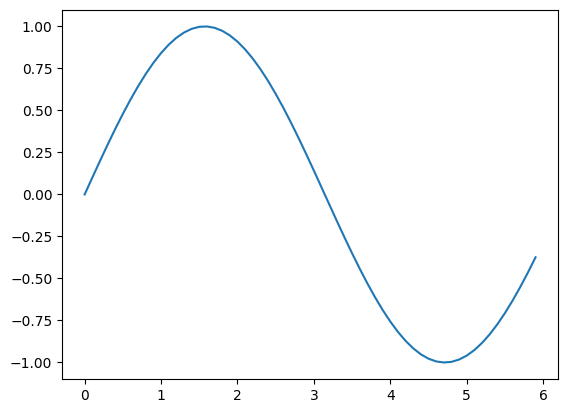

In [20]:
x = np.arange(0, 6, 0.1)
y = np.sin(x)
plt.plot(x, y)
plt.show()

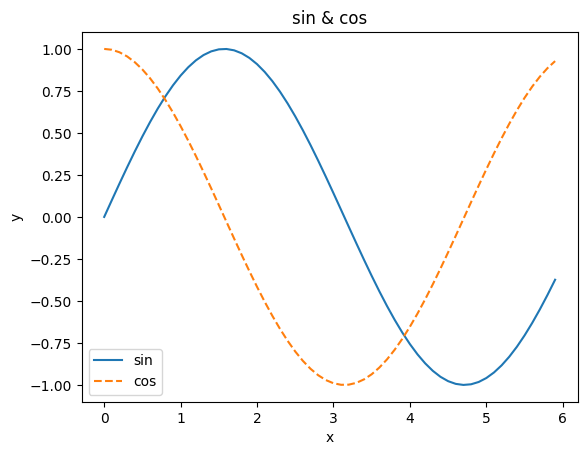

In [21]:
y2 = np.cos(x)

plt.plot(x, y, label='sin')
plt.plot(x, y2, label='cos', linestyle='--')
plt.xlabel("x")
plt.ylabel("y")
plt.title('sin & cos')
plt.legend()
plt.show()

# chap2

## 感知机

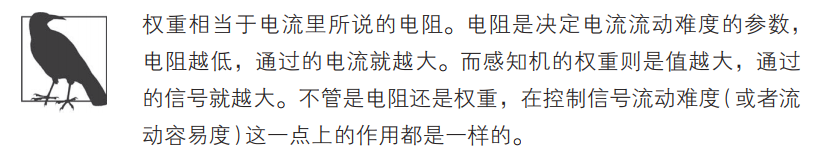
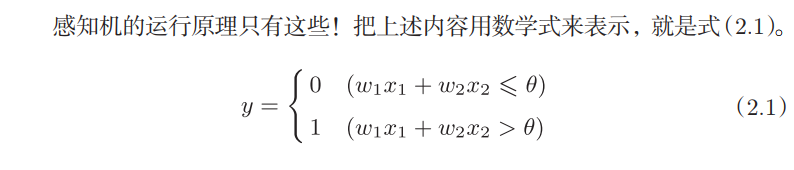
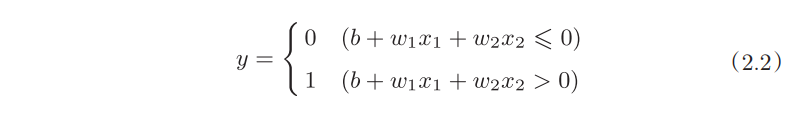

式（2.1）和式（2.2）虽然有一个符号不同，但表达的内容是完全相同的。
此处， b称为偏置， w1和w2称为权重。如式（2.2）所示，感知机会计算输入
信号和权重的乘积，然后加上偏置，如果这个值大于0则输出1，否则输出0。

具体地说， w1和w2是控制输入信号的重要性的参数，而偏置是调
整神经元被激活的容易程度（输出信号为1的程度）的参数。比如，若b为
−0.1，则只要输入信号的加权总和超过0.1，神经元就会被激活。但是如果b
为−20.0，则输入信号的加权总和必须超过20.0，神经元才会被激活。

In [22]:
import numpy as BrokenPipeError

x = np.array([0, 1])      # 输入
w = np.array([0.5, 0.5])  # 权重
b = -0.7                  # 偏置
print(w*x)
print(np.sum(w*x))
print(np.sum(w*x) + b)

[0.  0.5]
0.5
-0.19999999999999996


感知机的局限性就在于它只能表示由一条直线分割的空间。图2-8这样弯
曲的曲线无法用感知机表示。另外，由图2-8这样的曲线分割而成的空间称为
非线性空间，由直线分割而成的空间称为线性空间。线性、非线性这两个术
语在机器学习领域很常见
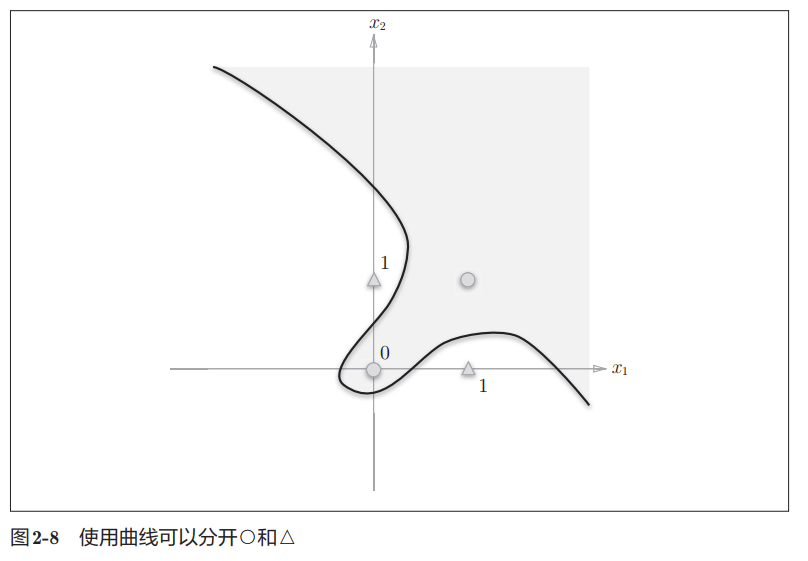

# chap3

## 阶跃

In [23]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

step_function(3)

1

In [24]:
import numpy as np

def step_function2(x):
    y = x > 0
    return np.array(y).astype(np.int32)  # 或者使用 int 作为替代

# 测试
print(step_function2(3))  # 应该返回 1
print(step_function2(-3))  # 应该返回 0

1
0


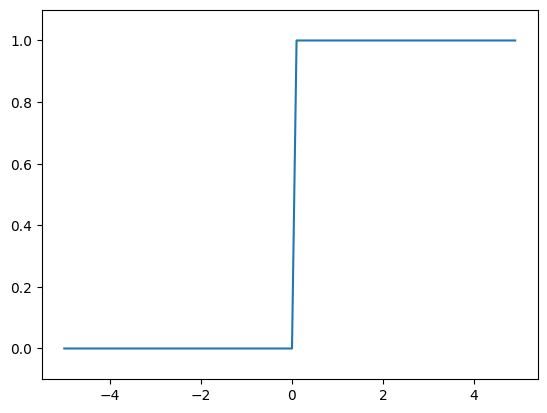

In [25]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function2(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)   # 指定y轴范围
plt.show()

## sigmoid

In [26]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
x = np.array([-1.0, 1.0, 2.0, 0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708, 0.5       ])

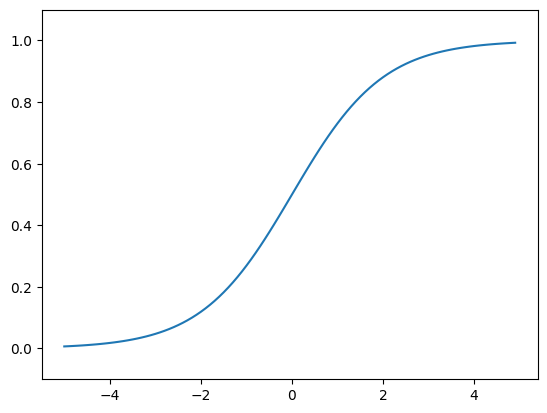

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38454 (\N{CJK UNIFIED IDEOGRAPH-9636}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36291 (\N{CJK UNIFIED IDEOGRAPH-8DC3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


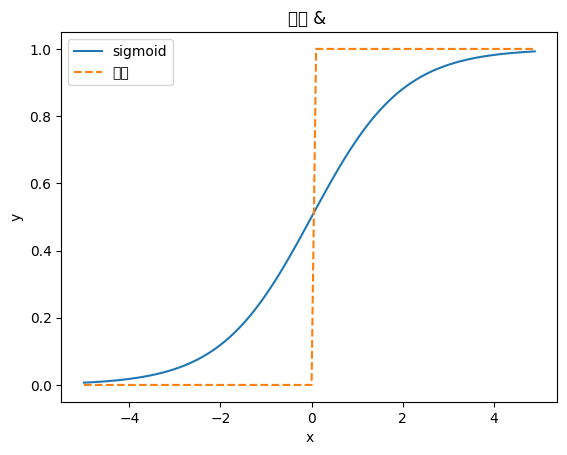

In [27]:
x = np.arange(-5.0, 5.0, 0.1)
y2 = sigmoid(x)
plt.plot(x, y2)
plt.ylim(-0.1, 1.1)   # 指定y轴范围
plt.show()

plt.plot(x, y2, label='sigmoid')
plt.plot(x, y, label='阶跃', linestyle='--')
plt.xlabel("x")
plt.ylabel("y")
plt.title('阶跃 & ')
plt.legend()
plt.show()

## ReLU

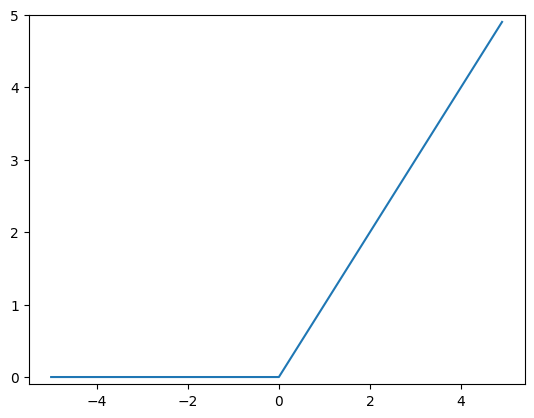

In [28]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y3 = relu(x)
plt.plot(x, y3)
plt.ylim(-0.1, 5)   # 指定y轴范围
plt.show()

## 多维数组

In [29]:
import numpy as BrokenPipeError

A = np.array([1, 2, 3, 4, 5])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4 5]
1
(5,)
5


这里的 A.shape的结果是个元组（tuple）。这是因为一维数组的
情况下也要返回和多维数组的情况下一致的结果。例如，二维数组时返回的
是元组 (4,3)，三维数组时返回的是元组(4,3,2)，因此一维数组时也同样以
元组的形式返回结果

In [30]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
print(A.shape)
print(B.shape)
np.dot(A, B)

(2, 2)
(2, 2)


array([[19, 22],
       [43, 50]])

In [31]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])  # shape(input=2,output=3)
B1 = np.array([0.1, 0.2, 0.3])

print(X.shape)
print(W1.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)
print(A1)
print(Z1)

(2,)
(2, 3)
(3,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [32]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])  # shape(input=3,output=2)
B2 = np.array([-0.5])
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(A2)
print(Z2)

[-0.08384016  0.51402696]
[0.47905223 0.62575001]


In [33]:
W3 = np.array([[0.1, 0.3],[0.2,0.4]])
B3 = np.array([-0.2, 0.4])

A3 = np.dot(Z2, W3) + B3
Y = A3
print(A3)
print(Y)

[-0.02694477  0.79401567]
[-0.02694477  0.79401567]


## Forward

In [34]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4],[0.2, 0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3],[0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

def forward(network, x):
    W1,W2,W3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)  # 激活函数
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    y  = a3
    return y

network = init_network()
print(network)
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

{'W1': array([[0.1, 0.3, 0.5],
       [0.2, 0.4, 0.6]]), 'b1': array([0.1, 0.2, 0.3]), 'W2': array([[0.1, 0.4],
       [0.2, 0.5],
       [0.3, 0.6]]), 'b2': array([0.1, 0.2]), 'W3': array([[0.1, 0.3],
       [0.2, 0.4]]), 'b3': array([0.1, 0.2])}
[0.39442138 0.84045873]


## Softmax

softmax
函数的输出值的总和是1。输出总和为1是softmax函数的一个重要性质。正
因为有了这个性质，我们才可以把softmax函数的输出解释为“概率”

In [35]:
a = np.array([0.3, 2.9, 1.0])
exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537  2.71828183]
22.242286005478107
[0.06068885 0.81709881 0.12221234]


一般而言，神经网络只把输出值最大的神经元所对应的类别作为识别结果。
并且，即便使用softmax函数，输出值最大的神经元的位置也不会变。因此，
神经网络在进行分类时，输出层的softmax函数可以省略。在实际的问题中，
由于指数函数的运算需要一定的计算机运算量，因此输出层的softmax函数
一般会被省略。 

In [36]:
x = np.array([[0.1, 0.8, 0.1]
            ,[0.3, 0.1, 0.6]
            ,[0.2, 0.5, 0.3]
            ,[0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1)
print(y)

[1 2 1 0]


## MNIST

In [37]:
# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np


url_base = 'https://ossci-datasets.s3.amazonaws.com/mnist/'  # mirror site
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

# dataset_dir = os.path.dirname(os.path.abspath(__file__))
dataset_dir = ''
save_file =  dataset_dir + "./mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name
    
    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_path)
    print("Done")
    
def download_mnist():
    for v in key_file.values():
       _download(v)
        
def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")
    
    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")    
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")
    
    return data
    
def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])    
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])
    
    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T
    

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """读入MNIST数据集
    
    Parameters
    ----------
    normalize : 将图像的像素值正规化为0.0~1.0
    one_hot_label : 
        one_hot_label为True的情况下，标签作为one-hot数组返回
        one-hot数组是指[0,0,1,0,0,0,0,0,0,0]这样的数组
    flatten : 是否将图像展开为一维数组
    
    Returns
    -------
    (训练图像, 训练标签), (测试图像, 测试标签)
    """
    if not os.path.exists(save_file):
        init_mnist()
        
    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)
    
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 


In [38]:
# 读取数据集
(x_train, t_train),(x_test, t_test) = load_mnist(flatten=True, normalize=False)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [39]:
print(x_train.shape) # (60_000, 784)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [40]:
import numpy as np
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

# 读取数据集
(x_train, t_train),(x_test, t_test) = load_mnist(flatten=True, normalize=False)
img = x_train[0]
print(img.shape)
label = t_train[0]
print(f"label = {label}") # 5


img = img.reshape(28, 28) # 形状进行还原
print(img.shape)

img_show(img)

(784,)
label = 5
(28, 28)


我们对这个MNIST数据集实现神经网络的推理处理。神经网络
的输入层有784个神经元，输出层有10个神经元。输入层的784这个数字来
源于图像大小的28 × 28 = 784，输出层的10这个数字来源于10类别分类（数
字0到9，共10类别）。此外，这个神经网络有2个隐藏层，第1个隐藏层有
50个神经元，第2个隐藏层有100个神经元。这个50和100可以设置为任何值。
下面我们先定义 get_data()、 init_network()、 predict()这3个函数

In [41]:
def softmax(x):
    c = np.max(x)
    exp_x = np.exp(x - c)
    sum_exp_x = np.sum(exp_x)
    y = exp_x / sum_exp_x
    return y

In [42]:
model_weight_path = '/kaggle/input/mnist-weight/sample_weight.pkl'

# 读取数据集
def get_data():
    (x_train, t_train),(x_test, t_test) = load_mnist(flatten=True, normalize=False)
    return x_test, t_test

# 初始化网络
def init_network():
    with open(model_weight_path, 'rb') as f:
        network = pickle.load(f)
    return network

# 模型推理
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y  = softmax(a3)
    return y

x, t = get_data()
network = init_network()

acc_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    pred = np.argmax(y)
    if pred == t[i]:
        acc_cnt += 1

print("Accuracy:" + str(float(acc_cnt) / len(x)))

<ipython-input-26-c89e1a56df98>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Accuracy:0.9207


### Batch

In [43]:
model_weight_path = '/kaggle/input/mnist-weight/sample_weight.pkl'

# 读取数据集
def get_data():
    (x_train, t_train),(x_test, t_test) = load_mnist(flatten=True, normalize=False)
    return x_test, t_test

# 初始化网络
def init_network():
    with open(model_weight_path, 'rb') as f:
        network = pickle.load(f)
    return network

# 模型推理
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y  = softmax(a3)
    return y

x, t = get_data()
network = init_network()
BATCH_SIZE = 100 # 批数量

acc_cnt = 0
for i in range(0, len(x), BATCH_SIZE):
    x_batch = x[i: i + BATCH_SIZE]
    y_batch = predict(network, x_batch)
    pred = np.argmax(y_batch, axis=1)           # 注意这里axis有点反逻辑
    acc_cnt += np.sum(pred == t[i: i+BATCH_SIZE])  # 注意这里有优化

print("Accuracy:" + str(float(acc_cnt) / len(x)))

Accuracy:0.9207


<ipython-input-26-c89e1a56df98>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


# chap4

## MSE（均方根，二/多分类）

In [44]:
import numpy as np

def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t)**2)


t = [0,   0,    1,   0,   0,    0,   0,   0,   0,   0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

print(mean_squared_error(np.array(y), np.array(t)))

t = [0,   0,    0,   1,   0,    0,   0,   0,   0,   0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

print(mean_squared_error(np.array(y), np.array(t)))

# 损失函数越“小”越好

0.09750000000000003
0.6974999999999999


## CE（交叉熵，二/多分类）

函数内部在计算np.log时，加上了一
个微小值delta。这是因为，当出现np.log(0)时， np.log(0)会变为负无限大
的-inf，这样一来就会导致后续计算无法进行。作为保护性对策，添加一个
微小值可以防止负无限大的发生。

In [45]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return - np.sum(t * np.log(y + delta))

t = [0,   0,    1,   0,   0,    0,   0,   0,   0,   0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

print(cross_entropy_error(np.array(y), np.array(t)))

t = [0,   0,    0,   1,   0,    0,   0,   0,   0,   0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

print(cross_entropy_error(np.array(y), np.array(t)))  # 差得离谱

# 损失函数越“小”越好

0.510825457099338
16.11809565095832


In [46]:
# 读取数据集
def get_data():
    (x_train, t_train),(x_test, t_test) = load_mnist(flatten=True, normalize=False)
    return x_train, t_train

get_data()
print(x_train.shape)
train_size = x_train.shape[0]    # 60000
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)  # 随技抽取 batch_size 个随机数

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(x_batch)
print(t_batch)

(60000, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[1 8 7 1 3 8 6 3 9 1]


在进行神经网络的学习时，不能将识别精度作为指标。因为如果以
识别精度为指标，则参数的导数在绝大多数地方都会变为0。

假设某个神经网络正
确识别出了100笔训练数据中的32笔，此时识别精度为32 %。如果以识别精
度为指标，即使稍微改变权重参数的值，识别精度也仍将保持在32 %，不会
出现变化。也就是说，仅仅微调参数，是无法改善识别精度的。即便识别精
度有所改善，它的值也不会像32.0123 . . . %这样连续变化，而是变为33 %、
34 %这样的不连续的、离散的值。而如果把损失函数作为指标，则当前损
失函数的值可以表示为0.92543 . . . 这样的值。并且，如果稍微改变一下参数
的值，对应的损失函数也会像0.93432 . . . 这样发生连续性的变化

阶跃函数就像“竹筒敲石”一样，只在某个瞬间产生变化。而sigmoid函数，
如图4-4所示，不仅函数的输出（竖轴的值）是连续变化的，曲线的斜率（导数）
也是连续变化的。也就是说， sigmoid函数的导数在任何地方都不为0。这对
神经网络的学习非常重要。得益于这个斜率不会为0的性质，神经网络的学
习得以正确进行。


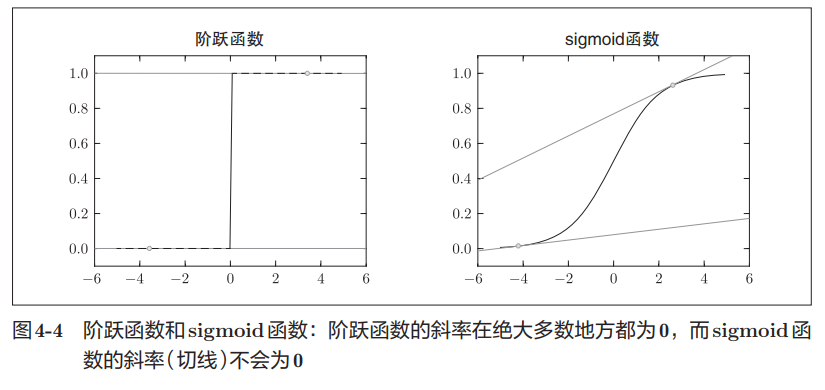
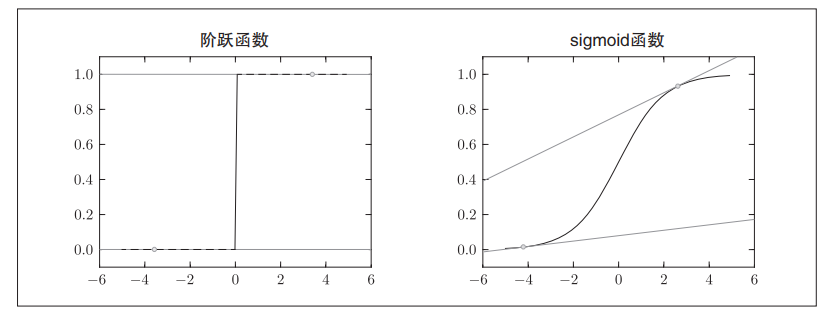

## 梯度

1.在上面的实现中，因为想把尽可能小的值赋给 h（可以话，想让h无限接
近0），所以h使用了10e-50（有50个连续的0的“0.00 . . . 1”）这个微小值。但
是，这样反而产生了舍入误差（rounding error）。所谓舍入误差，是指因省
略小数的精细部分的数值（比如，小数点第8位以后的数值）而造成最终的计
算结果上的误差。

2.第二个需要改进的地方与函数f的差分有关。虽然上述实现中计算了函
数 f在 x+h和 x之间的差分，但是必须注意到，这个计算从一开始就有误差。
如图4-5所示，“真的导数”对应函数在x处的斜率（称为切线），但上述实现
中计算的导数对应的是(x + h)和x之间的斜率。因此，真的导数（真的切线）
和上述实现中得到的导数的值在严格意义上并不一致。这个差异的出现是因
为h不可能无限接近0。

In [47]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(len(x)):  # 注意这里 np.array 是 size 也可以用 len(xxx)
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val
    return grad

def function_2(x):
    return x[0]**2 + x[1]**2

numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

## 梯度下降法（手撕）

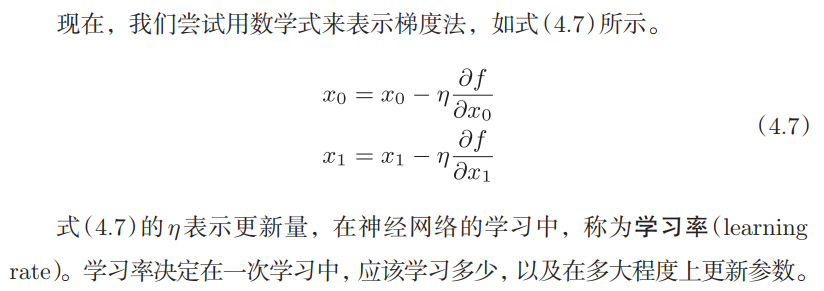

In [48]:
def gradient_descent(f, init_x, lr=0.01, step_num=1000):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)  # 梯度的计算
        x -= lr * grad                   # 更新梯度

    return x


gradient_descent(function_2, np.array([-3.0, 4.0]), lr=0.1, step_num=1000)

array([-5.65129794e-21,  4.96308368e-21])

In [49]:
gradient_descent(function_2, np.array([-3.0, 4.0]), lr=10, step_num=1000)  # 太大了

array([-2.58983747e+13, -1.29524862e+12])

In [50]:
gradient_descent(function_2, np.array([-3.0, 4.0]), lr=1, step_num=1000)  # 还是大了

array([-3.,  4.])

In [51]:
gradient_descent(function_2, np.array([-3.0, 4.0]), lr=1e-6, step_num=1000)  # 太小了

array([-2.99400599,  3.99200799])

## 神经网络的梯度

In [52]:
import numpy as np

# from common.functions import softmax, cross_entropy_error
# from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)  # 权重初始化

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

net = simpleNet()
print(net.W)

[[-1.39020925  0.21083016 -1.06238956]
 [-0.67358405  0.53019915  0.9208414 ]]


In [53]:
x = np.array([0.6, 0.9])
p = net.predict(x)   # 输出是点积的结果
# print(x)
print(p)
print(np.argmax(p))

[-1.4403512   0.60367733  0.19132353]
1


In [54]:
t = np.array([0, 1, 0])  # ground true
net.loss(x, t)

0.5831066227033163

In [55]:
# 计算梯度

def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)  # 这里只是求梯度, 不涉及梯度下降
print(dW)

[[0. 0. 0.]
 [0. 0. 0.]]


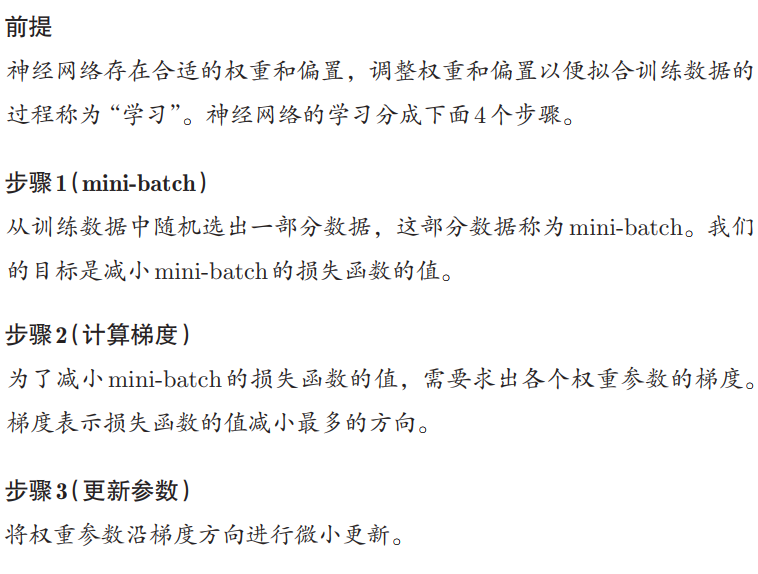
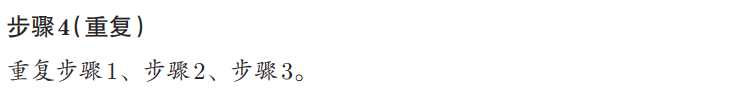

## 2层神经网络

In [56]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 权重初始化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    # 进行推理
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        z2 = softmax(a2)  # 注意这里是 sigmoid 而不能是 sigmoid
        return z2

    # x:输入数据, t:标签
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)

    # 梯度下降, 需要评估指标
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, aixs=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x:输入数据, t:标签
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)  # ‘W‘是一个伪参数
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads

In [57]:
twoLayers = TwoLayerNet(2,3,3)  # output_size 肯定不能是 1, 否则直接预测出来就没后边的事情了
print(twoLayers.params)

{'W1': array([[-0.01006379,  0.00286758, -0.01723415],
       [ 0.0018241 , -0.01784049,  0.01810752]]), 'b1': array([0., 0., 0.]), 'W2': array([[-0.00176085, -0.00464178,  0.00024931],
       [ 0.00841338,  0.00177371, -0.00407498],
       [ 0.0077554 ,  0.00403088,  0.01235514]]), 'b2': array([0., 0., 0.])}


In [58]:
# 计算pred
x = np.array([3.0, 4.0])
pred_t = np.argmax(pred)
print(pred)
print(pred_t)

[8 4 0 1 2 9 4 5 6 7 8 0 1 2 3 4 9 8 9 7 8 6 4 1 9 3 8 4 4 7 0 1 9 2 8 7 8
 2 6 0 0 6 3 3 8 9 1 4 0 6 1 0 0 6 2 1 1 7 7 8 4 6 0 7 0 3 6 8 7 1 3 2 4 9
 4 2 6 4 1 7 2 6 2 0 1 2 8 4 5 6 7 8 9 0 1 2 3 4 8 6]
5


In [59]:
# 计算pred(同上) && 计算Loss
t = np.array([1, 1, 0])  # t_dim = output_size 维度一致
loss = twoLayers.loss(x, t)
print(loss)

2.197584188052701


In [60]:
# 更新梯度
dW = twoLayers.numerical_gradient(x, t)
dW

{'W1': array([[0.00019884, 0.00019884, 0.00019884],
        [0.00026511, 0.00026511, 0.00026511]]),
 'b1': array([ 0.0005768 , -0.00152351,  0.00107928]),
 'W2': array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 'b2': array([-0.3312764, -0.3356231,  0.6668995])}

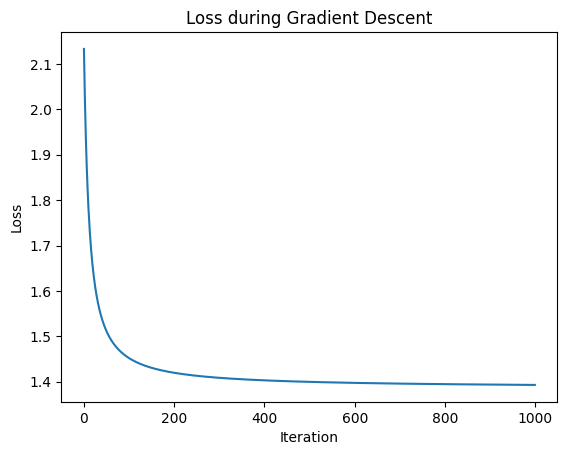

In [61]:
# 重复上述过程(梯度下降)

learning_rate = 0.1
loss_list = []

def gradient_descent(init_x, t, lr=0.01, step_num=100):
    x = init_x
    for i in range(step_num):
        grad = twoLayers.numerical_gradient(x, t)  # 梯度的计算,梯度信息保存在 Grads 变量中
        for key in ('W1','W2','b1','b2'):             # 然后逐个更新就可以了
            twoLayers.params[key] -= learning_rate * grad[key]       

        loss_tmp = twoLayers.loss(x, t)  # 这里不参与更新,只是为了可视化
        loss_list.append(loss_tmp)

# predict/loss/gradient更新
gradient_descent(x, t, lr=0.1, step_num=1000)

# 可视化loss_list
plt.plot(loss_list)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss during Gradient Descent')
plt.show()

## 2层神经网络-MNIST训练⭐数值微分计算

In [62]:
# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt


url_base = 'https://ossci-datasets.s3.amazonaws.com/mnist/'  # mirror site
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

# dataset_dir = os.path.dirname(os.path.abspath(__file__))
dataset_dir = ''
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name
    
    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_path)
    print("Done")
    
def download_mnist():
    for v in key_file.values():
       _download(v)
        
def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")
    
    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")    
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")
    
    return data
    
def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])    
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])
    
    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T
    

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """读入MNIST数据集
    
    Parameters
    ----------
    normalize : 将图像的像素值正规化为0.0~1.0
    one_hot_label : 
        one_hot_label为True的情况下，标签作为one-hot数组返回
        one-hot数组是指[0,0,1,0,0,0,0,0,0,0]这样的数组
    flatten : 是否将图像展开为一维数组
    
    Returns
    -------
    (训练图像, 训练标签), (测试图像, 测试标签)
    """
    if not os.path.exists(save_file):
        init_mnist()
        
    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)
    
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 


if __name__ == '__main__':
    init_mnist()


Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [63]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 还原值
        it.iternext()   
        
    return grad


def sigmoid(x):
    return 1 / (1 + np.exp(-x))    


def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 溢出对策
    return np.exp(x) / np.sum(np.exp(x))


def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 监督数据是one-hot-vector的情况下，转换为正确解标签的索引
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

### 官方demo

In [64]:
# coding: utf-8
# import sys, os
# sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
# from common.functions import *
# from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:输入数据, t:监督数据
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:输入数据, t:监督数据
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        

In [65]:
# # coding: utf-8
# # import sys, os
# # sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
# import numpy as np
# import matplotlib.pyplot as plt
# # from dataset.mnist import load_mnist
# # from two_layer_net import TwoLayerNet

# # 读入数据
# (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# iters_num = 1000 # 适当设定循环的次数
# train_size = x_train.shape[0]
# batch_size = 100
# learning_rate = 0.1

# train_loss_list = []
# train_acc_list = []
# test_acc_list = []

# iter_per_epoch = max(train_size / batch_size, 1)

# print("开始训练   ===>  ")

# for i in range(iters_num):
#     batch_mask = np.random.choice(train_size, batch_size)
#     x_batch = x_train[batch_mask]
#     t_batch = t_train[batch_mask]
    
#     # 计算梯度
#     grad = network.numerical_gradient(x_batch, t_batch)
#     # grad = network.gradient(x_batch, t_batch)
    
#     # 更新参数
#     for key in ('W1', 'b1', 'W2', 'b2'):
#         network.params[key] -= learning_rate * grad[key]
    
#     loss = network.loss(x_batch, t_batch)
#     train_loss_list.append(loss)
    
#     # if i % iter_per_epoch == 0:
#     if i % 10 == 0:
#         train_acc = network.accuracy(x_train, t_train)
#         test_acc = network.accuracy(x_test, t_test)
#         train_acc_list.append(train_acc)
#         test_acc_list.append(test_acc)
#         print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

In [66]:
# # 绘制图形
# markers = {'train': 'o', 'test': 's'}
# x = np.arange(len(train_acc_list))
# plt.plot(x, train_acc_list, label='train acc')
# plt.plot(x, test_acc_list, label='test acc', linestyle='--')
# plt.xlabel("epochs")
# plt.ylabel("accuracy")
# plt.ylim(0, 1.0)
# plt.legend(loc='lower right')
# save_path = 'accuracy.png'  # 修改为你想保存的路径和文件名
# plt.savefig(save_path)
# plt.show()

In [67]:
# # 可视化 train_loss_list
# plt.plot(train_loss_list)
# plt.xlabel('Iteration')
# plt.ylabel('Loss')
# plt.title('Loss during Gradient Descent')
# # 保存到指定路径
# save_path = 'loss_plot.png'  # 修改为你想保存的路径和文件名
# plt.savefig(save_path)
# plt.show()

# chap5

## 乘法层MulLayer

In [68]:
class MulLayer:
    def __init__(self):
        self.x = x
        self.y = y

    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        return out

    def backward(self, dout):
        dx = dout * self.y  # 翻转x和y
        dy = dout * self.x
        return dx, dy

In [69]:
apple = 100
apple_num = 2
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# forward(先apple_layer再tax_layer)
apple_price = mul_apple_layer.forward(apple, apple_num)  # apple * apple_num = 100 * 2 = 200
price = mul_tax_layer.forward(apple_price, tax)  # apple_price * tax = 200 * 1.1 = 220
print(f"price={price}")

# backward(先tax_layer再apple_layer)
dprice = 1  # dz/dz = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)  # dprice * tax = 1.1, dprice * 200 = 200
dapple, dapple_num = mul_apple_layer.backward(dapple_price)  # dapple_price * apple_num = 2.2, dapple_price * apple = 110
print(f"第一个乘法：dapple_price={dapple_price}\n第二个乘法：dtax={dtax}, dapple={dapple}, dapple_num={dapple_num}")

price=220.00000000000003
第一个乘法：dapple_price=1.1
第二个乘法：dtax=200, dapple=2.2, dapple_num=110.00000000000001


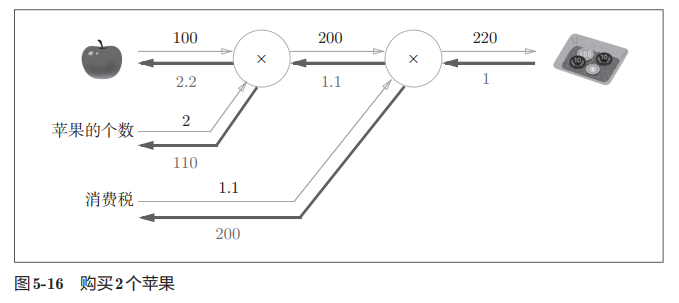

## 加法层AddLayer

In [70]:
class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y
        return out

    def backward(self, dout):  # 就是什么也不做
        dx = dout * 1
        dy = dout * 1
        return dx, dy

In [71]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)  # 100 * 2 = 200
orange_price = mul_orange_layer.forward(orange, orange_num)  # 150 * 3 = 450
all_price = add_apple_orange_layer.forward(apple_price, orange_price)  # 200 + 450 = 650
price = mul_tax_layer.forward(all_price, tax)  # 650 * 1.1 = 715

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)  # 1.1, 650
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)  # 1.1, 1.1  这里要注意
dorange, dorange_num = mul_orange_layer.backward(dorange_price)  # 3.3, 165
dapple, dapple_num = mul_apple_layer.backward(dapple_price)  # 2.2, 110

print(dall_price, dtax)
print(dapple_price, dorange_price)
print(dorange, dorange_num)
print(dapple, dapple_num)

1.1 650
1.1 1.1
3.3000000000000003 165.0
2.2 110.00000000000001


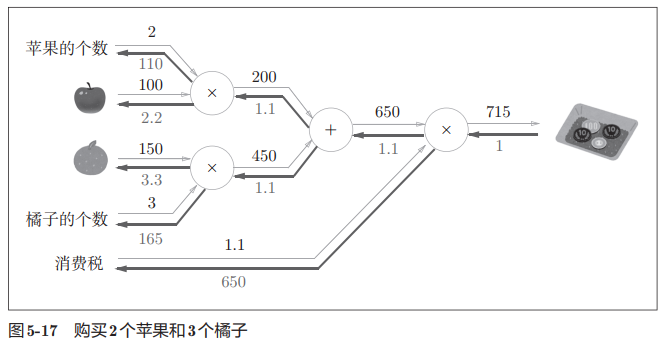

## Relu传播

In [72]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        return out

    def backward(self, dout):  # 要么本身要么0
        dout[self.mask] = 0
        dx = dout
        return dx

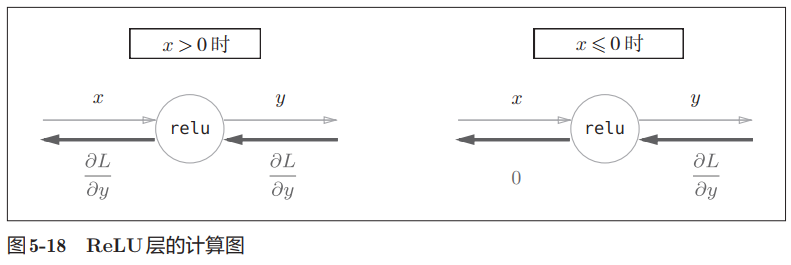

## Sigmoid传播

In [73]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out  # 前边的out
        return dx

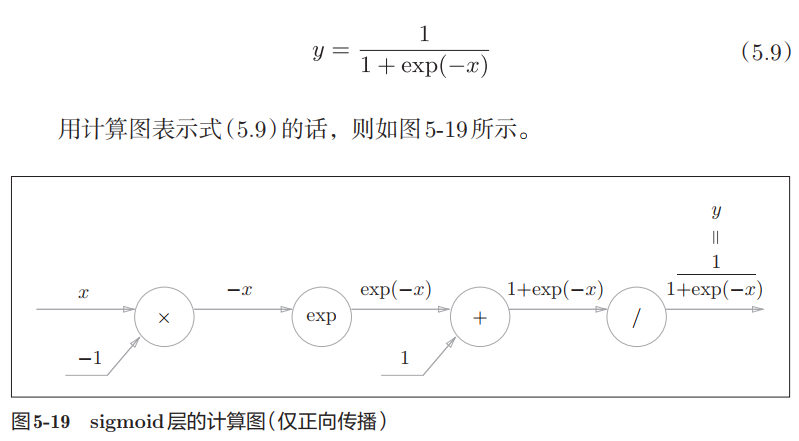
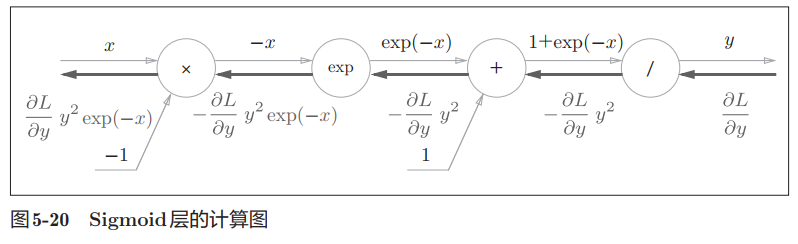
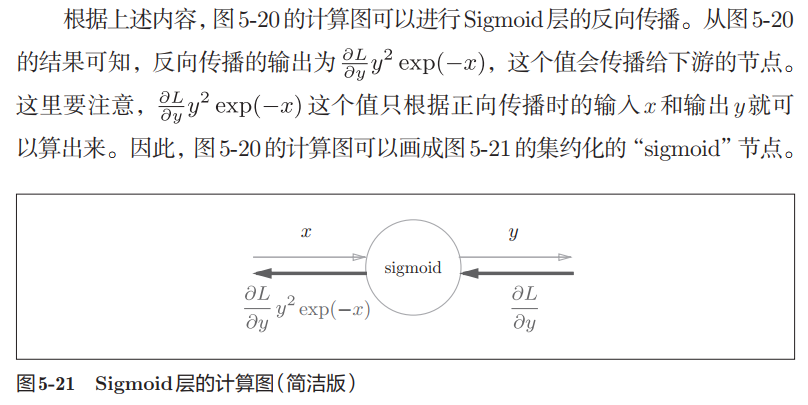

## Affine/Softmax层

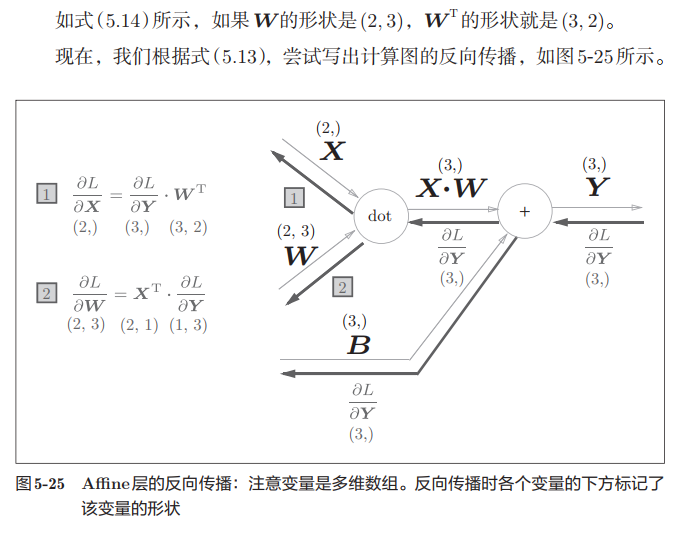

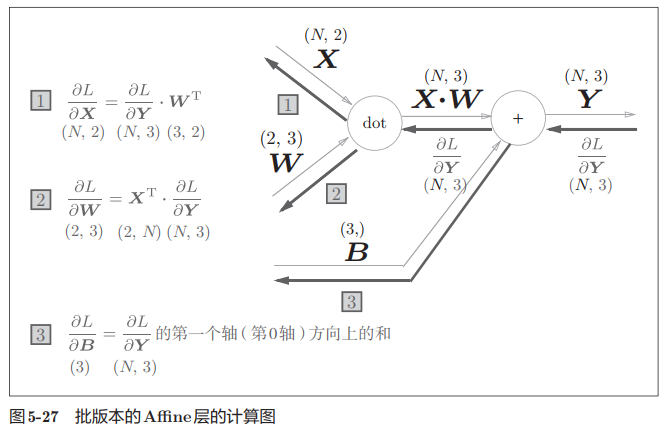

加上偏置时，需要特别注意。正向传播时，偏置被加到X· W的各个
数据上。比如， N = 2（数据为2个）时，偏置会被分别加到这2个数据（各自
的计算结果）上；

因此，反向传播时，各个数据的反向传播的值需要汇总为偏置的元素。

In [74]:
class Affine:
    def __init__(self, w, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)  # 类比于乘法层MulLayer的”翻转值“
        self.db = np.sum(dout, axis=0)
        return dx

## Softmax-with-Loss层

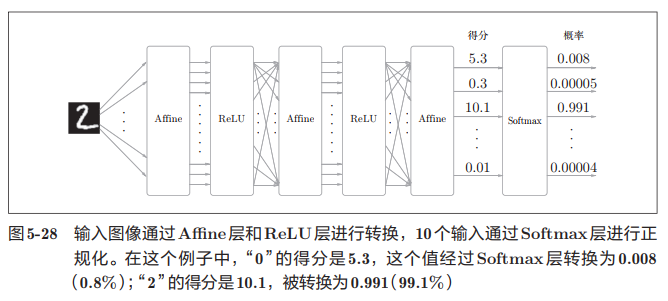

In [75]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 溢出对策
    return np.exp(x) / np.sum(np.exp(x))


def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 监督数据是one-hot-vector的情况下，转换为正确解标签的索引
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)  # pred和label计算交叉熵
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        return dx

## 2层神经网络-MNIST训练⭐误差反向传播

像这样通过将神经网络的组成元素以层的方式实现，可以轻松地构建神
经网络。这个用层进行模块化的实现具有很大优点。因为想另外构建一个神
经网络（比如5层、 10层、 20层……的大的神经网络）时，只需像组装乐高
积木那样添加必要的层就可以了。之后，通过各个层内部实现的正向传播和
反向传播，就可以正确计算进行识别处理或学习所需的梯度。

In [1]:
# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt


url_base = 'https://ossci-datasets.s3.amazonaws.com/mnist/'  # mirror site
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

# dataset_dir = os.path.dirname(os.path.abspath(__file__))
dataset_dir = ''
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name
    
    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_path)
    print("Done")
    
def download_mnist():
    for v in key_file.values():
       _download(v)
        
def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")
    
    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")    
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")
    
    return data
    
def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])    
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])
    
    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T
    

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """读入MNIST数据集
    
    Parameters
    ----------
    normalize : 将图像的像素值正规化为0.0~1.0
    one_hot_label : 
        one_hot_label为True的情况下，标签作为one-hot数组返回
        one-hot数组是指[0,0,1,0,0,0,0,0,0,0]这样的数组
    flatten : 是否将图像展开为一维数组
    
    Returns
    -------
    (训练图像, 训练标签), (测试图像, 测试标签)
    """
    if not os.path.exists(save_file):
        init_mnist()
        
    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)
    
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 


if __name__ == '__main__':
    init_mnist()


Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [18]:
import numpy as np
# from common.layers import *
# from common.gradient import numerical_gradient
from collections import OrderedDict

class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        return out

    def backward(self, dout):  # 要么本身要么0
        dout[self.mask] = 0
        dx = dout
        return dx

class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out  # 前边的out
        return dx

class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        return out
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        return dx

class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)  # pred和label计算交叉熵
        return self.loss

    def backward(self, dout=1):
         # 监督数据是one-hot-vector的情况
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        return dx

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        # 生成层
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # x:输入数据, t:监督数据
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:输入数据, t:监督数据
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 设定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads


In [31]:
# coding: utf-8
# import sys, os
# sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
# from dataset.mnist import load_mnist
# from two_layer_net import TwoLayerNet

# 读入数据
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 1000 # 适当设定循环的次数
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list_gd = []
train_acc_list_gd = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

print("开始训练   ===>  ")

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 计算梯度
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list_gd.append(loss)
    
    # if i % iter_per_epoch == 0:
    if i % 10 == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list_gd.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

开始训练   ===>  
train acc, test acc | 0.11828333333333334, 0.1164
train acc, test acc | 0.22835, 0.2328
train acc, test acc | 0.3444333333333333, 0.3523
train acc, test acc | 0.28955, 0.2924
train acc, test acc | 0.32393333333333335, 0.3216
train acc, test acc | 0.37915, 0.3766
train acc, test acc | 0.5401166666666667, 0.5424
train acc, test acc | 0.6122833333333333, 0.6092
train acc, test acc | 0.6678, 0.6732
train acc, test acc | 0.7120333333333333, 0.7184
train acc, test acc | 0.7715, 0.7766
train acc, test acc | 0.7646833333333334, 0.7753
train acc, test acc | 0.7745, 0.782
train acc, test acc | 0.7888333333333334, 0.7978
train acc, test acc | 0.8080666666666667, 0.8157
train acc, test acc | 0.8203166666666667, 0.8215
train acc, test acc | 0.8334333333333334, 0.8378
train acc, test acc | 0.8302666666666667, 0.8397
train acc, test acc | 0.8430166666666666, 0.8471
train acc, test acc | 0.8407166666666667, 0.8444
train acc, test acc | 0.8465666666666667, 0.852
train acc, test acc | 0.84

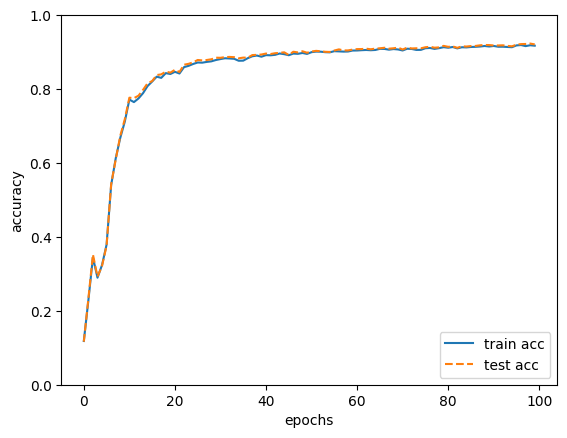

In [32]:
# 绘制图形
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list_gd))
plt.plot(x, train_acc_list_gd, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
save_path = 'accuracy_gradient.png'  # 修改为你想保存的路径和文件名
plt.savefig(save_path)
plt.show()

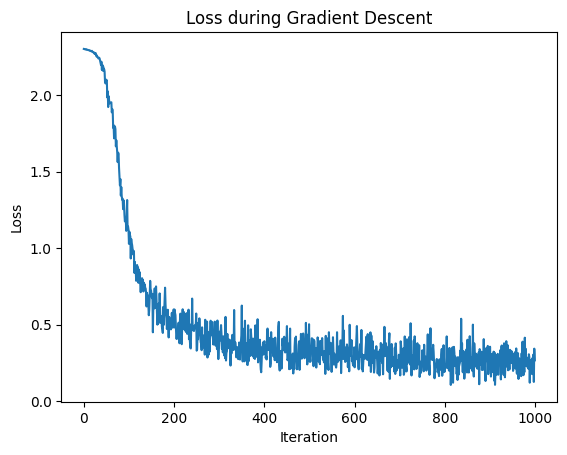

In [33]:
# 可视化 train_loss_list_gd
plt.plot(train_loss_list_gd)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss during Gradient Descent')
# 保存到指定路径
save_path = 'loss_plot_gradient.png'  # 修改为你想保存的路径和文件名
plt.savefig(save_path)
plt.show()

# chap6